In [1]:
import gzip
from Bio import SeqIO, SeqRecord
from Bio.SeqUtils.CodonUsage import CodonAdaptationIndex
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import re
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from datetime import datetime
import random
import pickle

human_proteome_path = "../../datasets/raw/Homo_sapiens.GRCh38.cds.all.fa.gz"
base_path = "../../datasets/raw/spikenuc0415_clean_n_X.fasta"
paths = []
omicron_path = "../../datasets/raw/gisaid_hcov-19_2023_05_18_11.fasta"

pattern = re.compile("[^AatTgGcC*?]")

for i in range(0, 15):
    path = base_path.replace("X", str(i+1))
    paths.append(path)

def is_gene_valid(seq):
    if len(seq) % 3 != 0:
        return False
    if re.search(pattern, str(seq)):
        return False
    
    return True

In [ ]:
def genetic_distance(cai_1, cai_2):
    

In [2]:
human_proteome = SeqIO.parse(gzip.open(human_proteome_path, "rt"), "fasta")
human_valid_proteome = []
for seq_record in tqdm(human_proteome):
    if is_gene_valid(seq_record.seq):
        human_valid_proteome.append(seq_record)
human_bias = CodonAdaptationIndex(human_valid_proteome)
print(human_bias)

121766it [00:02, 52175.30it/s]


AAA	0.804
AAC	1.000
AAG	1.000
AAT	0.946
ACA	0.859
ACC	1.000
ACG	0.317
ACT	0.741
AGA	1.000
AGC	1.000
AGG	0.944
AGT	0.668
ATA	0.384
ATC	1.000
ATG	1.000
ATT	0.822
CAA	0.372
CAC	1.000
CAG	1.000
CAT	0.772
CCA	0.921
CCC	1.000
CCG	0.340
CCT	0.962
CGA	0.513
CGC	0.762
CGG	0.895
CGT	0.372
CTA	0.191
CTC	0.491
CTG	1.000
CTT	0.367
GAA	0.790
GAC	1.000
GAG	1.000
GAT	0.935
GCA	0.623
GCC	1.000
GCG	0.253
GCT	0.706
GGA	0.819
GGC	1.000
GGG	0.761
GGT	0.527
GTA	0.277
GTC	0.520
GTG	1.000
GTT	0.426
TAA	0.516
TAC	1.000
TAG	0.401
TAT	0.857
TCA	0.678
TCC	0.906
TCG	0.220
TCT	0.818
TGA	1.000
TGC	1.000
TGG	1.000
TGT	0.889
TTA	0.213
TTC	1.000
TTG	0.349
TTT	0.913



In [2]:
human_proteome = SeqIO.parse(gzip.open(human_proteome_path, "rt"), "fasta")
human_valid_proteome = []
for seq_record in tqdm(human_proteome):
    if is_gene_valid(seq_record.seq):
        human_valid_proteome.append(seq_record)
human_bias = CodonAdaptationIndex(human_valid_proteome)
print(human_bias)

covid_biases = []

for path in paths:
    all = []
    i = 0
    with open(path, "r") as handle:
        for seq_record in tqdm(SeqIO.parse(path, "fasta")):
            all.append(seq_record)

        for seq in tqdm(random.sample(all, 10000)):
            if is_gene_valid(seq.seq):
                bias = CodonAdaptationIndex([seq])
                bias["date"] = seq.description.split("|")[2]
                try:
                    datetime.strptime(bias["date"], "%Y-%m-%d")
                    covid_biases.append(bias)
                    i+=1
                except ValueError:
                    # print(bias["date"])
                    continue

121766it [00:02, 55990.32it/s]


AAA	0.804
AAC	1.000
AAG	1.000
AAT	0.946
ACA	0.859
ACC	1.000
ACG	0.317
ACT	0.741
AGA	1.000
AGC	1.000
AGG	0.944
AGT	0.668
ATA	0.384
ATC	1.000
ATG	1.000
ATT	0.822
CAA	0.372
CAC	1.000
CAG	1.000
CAT	0.772
CCA	0.921
CCC	1.000
CCG	0.340
CCT	0.962
CGA	0.513
CGC	0.762
CGG	0.895
CGT	0.372
CTA	0.191
CTC	0.491
CTG	1.000
CTT	0.367
GAA	0.790
GAC	1.000
GAG	1.000
GAT	0.935
GCA	0.623
GCC	1.000
GCG	0.253
GCT	0.706
GGA	0.819
GGC	1.000
GGG	0.761
GGT	0.527
GTA	0.277
GTC	0.520
GTG	1.000
GTT	0.426
TAA	0.516
TAC	1.000
TAG	0.401
TAT	0.857
TCA	0.678
TCC	0.906
TCG	0.220
TCT	0.818
TGA	1.000
TGC	1.000
TGG	1.000
TGT	0.889
TTA	0.213
TTC	1.000
TTG	0.349
TTT	0.913



750709it [00:11, 65598.42it/s]
100%|██████████| 10000/10000 [00:13<00:00, 764.24it/s]
725577it [00:10, 68553.58it/s]
100%|██████████| 10000/10000 [00:12<00:00, 793.14it/s]
628270it [00:09, 66726.59it/s]
100%|██████████| 10000/10000 [00:11<00:00, 846.82it/s]
614948it [00:08, 71399.84it/s]
100%|██████████| 10000/10000 [00:11<00:00, 838.34it/s]
732090it [00:10, 72126.83it/s]
100%|██████████| 10000/10000 [00:12<00:00, 804.87it/s]
643698it [00:08, 72259.02it/s]
100%|██████████| 10000/10000 [00:12<00:00, 788.91it/s]
609836it [00:08, 68106.74it/s]
100%|██████████| 10000/10000 [00:12<00:00, 780.67it/s]
504512it [00:07, 65915.86it/s]
100%|██████████| 10000/10000 [00:12<00:00, 778.59it/s]
542315it [00:07, 67829.39it/s]
100%|██████████| 10000/10000 [00:13<00:00, 749.12it/s]
638398it [00:09, 67567.34it/s]
100%|██████████| 10000/10000 [00:12<00:00, 779.20it/s]
612798it [00:08, 69918.57it/s]
100%|██████████| 10000/10000 [00:12<00:00, 782.15it/s]
680992it [00:10, 64552.70it/s]
100%|██████████| 10000/

In [3]:
omicron_biases = []

with open(omicron_path, "r") as handle:
        for seq_record in tqdm(SeqIO.parse(handle, "fasta")):
            if is_gene_valid(seq_record.seq):
                bias = CodonAdaptationIndex([seq_record])
                bias["date"] = seq_record.description.split("|")[2]
                try:
                    datetime.strptime(bias["date"], "%Y-%m-%d")
                    omicron_biases.append(bias)
                    i+=1
                except ValueError:
                    # print(bias["date"])
                    continue

20it [00:00, 678.32it/s]


In [16]:
print(covid_biases[0:10])
print(omicron_biases[0:10])

with open('../data/covid_biases.pkl', 'wb') as f:
    pickle.dump(covid_biases, f)

[{'AAA': 1.0, 'AAC': 0.6296296296296297, 'AAG': 0.6052631578947368, 'AAT': 1.0, 'ACA': 0.9069767441860465, 'ACC': 0.23255813953488372, 'ACG': 0.06976744186046512, 'ACT': 1.0, 'AGA': 1.0, 'AGC': 0.13513513513513514, 'AGG': 0.5, 'AGT': 0.4594594594594595, 'ATA': 0.4090909090909091, 'ATC': 0.3409090909090909, 'ATG': 1.0, 'ATT': 1.0, 'CAA': 1.0, 'CAC': 0.38461538461538464, 'CAG': 0.34782608695652173, 'CAT': 1.0, 'CCA': 0.8928571428571429, 'CCC': 0.14285714285714285, 'CCG': 0.017857142857142856, 'CCT': 1.0, 'CGA': 0.025, 'CGC': 0.05, 'CGG': 0.1, 'CGT': 0.45, 'CTA': 0.25, 'CTC': 0.3333333333333333, 'CTG': 0.08333333333333333, 'CTT': 1.0, 'GAA': 1.0, 'GAC': 0.4186046511627907, 'GAG': 0.4117647058823529, 'GAT': 1.0, 'GCA': 0.6829268292682927, 'GCC': 0.1951219512195122, 'GCG': 0.04878048780487805, 'GCT': 1.0, 'GGA': 0.3541666666666667, 'GGC': 0.3125, 'GGG': 0.0625, 'GGT': 1.0, 'GTA': 0.3125, 'GTC': 0.4166666666666667, 'GTG': 0.2708333333333333, 'GTT': 1.0, 'TAA': 1.0, 'TAC': 0.35, 'TAG': 0.5, '

In [4]:
with open('../data/covid_biases.pkl', 'rb') as f:
    covid_biases = pickle.load(f)

/home/dominik/miniconda3/envs/spike_rna/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='date', ylabel='distance'>

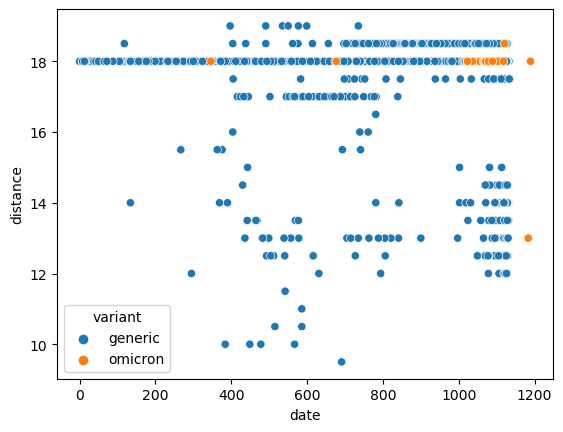

In [18]:
def batch_genetic_distance(cai_1, cai_2):
    cai_1_pd = pd.DataFrame(cai_1).drop(columns=["date"])
    cai_2_pd = pd.DataFrame([cai_2])
    # set all values <1 to 0
    # print(cai_1_pd.head())
    for column in cai_1_pd.columns:
        cai_1_pd[column].loc[cai_1_pd[column] < 1] = 0
    # print(cai_1_pd.head())
    for column in cai_2_pd.columns:
        cai_2_pd[column].loc[cai_2_pd[column] < 1] = 0

    return abs(cai_1_pd - cai_2_pd.values.squeeze()).sum(axis=1) / 2

def days(d):
    return d.days

full_biases = covid_biases + omicron_biases
# print(full_biases[0:10])

covid_biases_pd = pd.DataFrame(full_biases)
covid_biases_pd["variant"] = "generic"
covid_biases_pd.iloc[-20:, covid_biases_pd.columns.get_loc('variant')] = "omicron"
# print(covid_biases_pd.iloc[-20:, covid_biases_pd.columns.get_loc('variant')])
covid_biases_pd["date"] = pd.to_datetime(covid_biases_pd["date"], format="%Y-%m-%d")
covid_biases_pd["date"] = (covid_biases_pd["date"] - min(covid_biases_pd["date"])).apply(days)
# print(covid_biases_pd.head())
# print(covid_biases_pd.tail())

genetic_distances = batch_genetic_distance(full_biases, human_bias)
genetic_distances = pd.DataFrame(genetic_distances, columns=["distance"])
# print(genetic_distances.head())
genetic_distances = pd.concat([genetic_distances, covid_biases_pd["date"], covid_biases_pd["variant"]], axis=1)

# print(genetic_distances.head())

sns.scatterplot(genetic_distances["date"], genetic_distances["distance"], hue=genetic_distances["variant"])

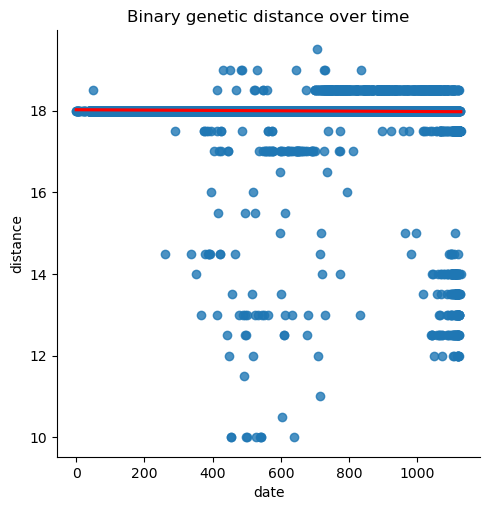

In [43]:
sns.lmplot(
    data=genetic_distances, x="date", y="distance", line_kws=dict(color="r")
).set(title='Binary genetic distance over time')

    distance
0  11.837542
1  11.757393
2  11.813612
3  11.757393
4  11.766707
    distance  date
0  11.837542   386
1  11.757393   357
2  11.813612   369
3  11.757393   373
4  11.766707   460


/home/dominik/miniconda3/envs/spike_rna/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


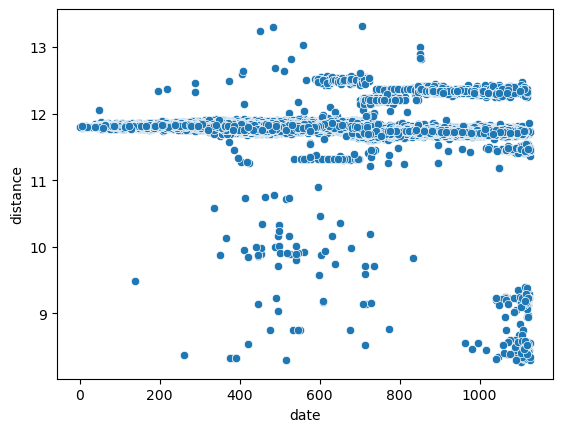

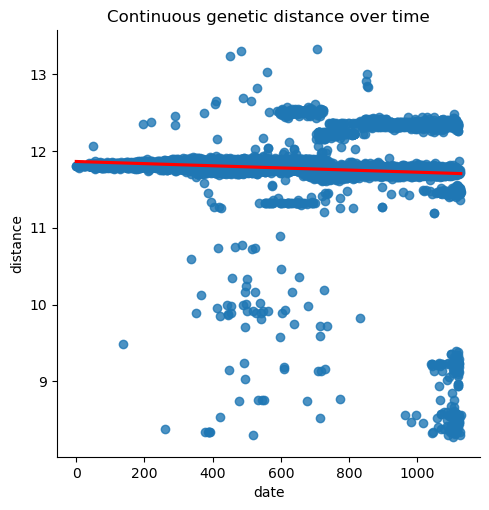

In [41]:
def batch_genetic_distance(cai_1, cai_2):
    cai_1_pd = pd.DataFrame(cai_1).drop(columns=["date"])
    cai_2_pd = pd.DataFrame([cai_2])
    # set all values <1 to 0
    # print(cai_1_pd.head())
    # for column in cai_1_pd.columns:
    #     cai_1_pd[column].loc[cai_1_pd[column] < 1] = 0
    # # print(cai_1_pd.head())
    # for column in cai_2_pd.columns:
    #     cai_2_pd[column].loc[cai_2_pd[column] < 1] = 0

    return abs(cai_1_pd - cai_2_pd.values.squeeze()).sum(axis=1) / 2

def days(d):
    return d.days

covid_biases_pd = pd.DataFrame(covid_biases)
covid_biases_pd["date"] = pd.to_datetime(covid_biases_pd["date"], format="%Y-%m-%d")
covid_biases_pd["date"] = (covid_biases_pd["date"] - min(covid_biases_pd["date"])).apply(days)

genetic_distances = batch_genetic_distance(covid_biases, human_bias)
genetic_distances = pd.DataFrame(genetic_distances, columns=["distance"])
print(genetic_distances.head())
genetic_distances = pd.concat([genetic_distances, covid_biases_pd["date"]], axis=1)

print(genetic_distances.head())

sns.scatterplot(genetic_distances["date"], genetic_distances["distance"])
sns.lmplot(
    data=genetic_distances, x="date", y="distance", line_kws=dict(color="r")
).set(title='Continuous genetic distance over time')
